# Изучение оттока клиентов
## Постановка задачи 
Банк хочет разработать кампанию лояльности по удержанию клиентов и для этого ему необходимо выяснить основные причины оттока клиентов. Для этого потребуется проанализировать показатели среди лояльных клиентов и клиентов, которые ушли. Это поможет выявить взаимосвязи и возможные причины. После разведывательного анализа, с целью выявления наиболее важных признаков оттока, банк сможет построить модель машинного обучения, которая будет прогнозировать уход клиента. 



### Подготовительные мероприятия
Установим необходимы библиотеки для анализа. В работе будем использовать:
* Pandas,
* Matplotlib,
* Seaborn
* Plotly

In [3]:
import pandas as pd
import seaborn as sns
import plotly
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

### Знакомство с датасетом

In [4]:
churn_data = pd.read_csv('churn.csv')
display(churn_data.head());
display(churn_data.info());

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


None

У нас имеется данные о 10000 клиентах банка и 14 признаков:
* RowNumber — номер строки таблицы
* CustomerId — идентификатор клиента
* Surname — фамилия клиента
* CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)
* Geography — страна клиента (банк международный)
* Gender — пол клиента
* Age — возраст клиента
* Tenure — сколько лет клиент пользуется услугами банка
* Balance — баланс на счетах клиента в банке
* NumOfProducts — количество услуг банка, которые приобрёл клиент
* HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет)
* IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)
* EstimatedSalary — предполагаемая заработная плата клиента
* Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)

Стобец 'RowNumber' не несет для нас никакой полезной информации, поэтому просто удалим данный столбец

In [5]:
churn_data.drop(['RowNumber'], axis=1, inplace=True)

#### 1. Для начала определим соотношение ушедших и лояльных клиентов.
Для удобства создадим столбец 'Status' с расшифровкой значений столбца 'Exited'. Вместо "0" - "Лояльный клиент", вмесо "1" - "Ушедший клиент". Так при построение графиков сразу будет понятна категория клиентов. Построим круговую диаграмму, которая покажет соотношение.

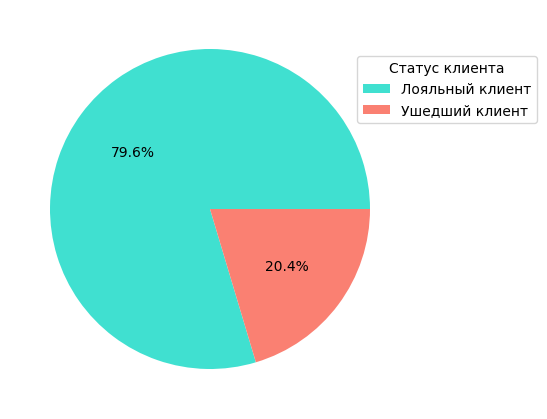

In [25]:

dict_replacement = {
                    0: 'Лояльный клиент',
                    1: 'Ушедший клиент'
                    }
churn_data['Status'] = churn_data['Exited'].map(dict_replacement)
clients = churn_data['Status'].value_counts()
fig = plt.figure(figsize=(4, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    clients,
    autopct='%.1f%%',
    colors=['turquoise', 'salmon']
    )
axes.legend(
            clients.index,
            title='Статус клиента', 
            loc='upper left', 
            bbox_to_anchor=(0.85, 0.9)
            );


<a id='share_departed'></a>
Лояльных клиентов (~80%) значительно больше, чем ушедших(~20%).Такое соотношение указывает на необходимость принятия мер по улучшению удержания клиентов. Несмотря на высокий уровень лояльности, банку следует обратить внимание на причины оттока, чтобы предотвратить их дальнейшее увеличение и улучшить общую клиентскую удовлетворенность. Высокий процент оттока клиентов может стать проблемой, если не будет решаться. Со временем он может начать негативно влиять на выручку и репутацию банка.


#### 2. Посмотрим на распередение баланса пользователей
С помощью гистограммы посмотрим на распрееделние баланса, среди всех клиентов, чей баланс более 2500.

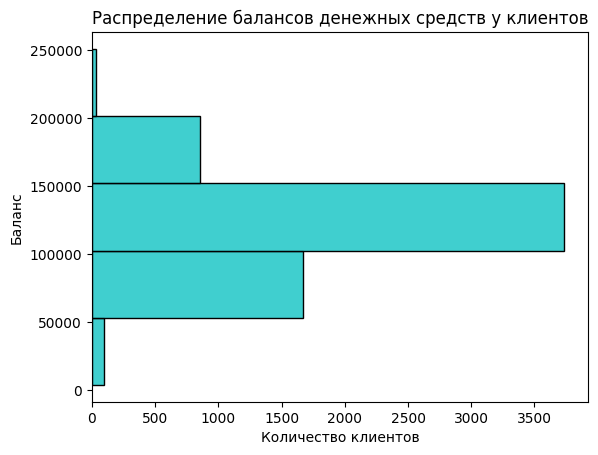

In [7]:
balance = churn_data[churn_data['Balance'] > 2500]['Balance'] # фильтрация данных
axes = figsize=(10, 10)

sns.histplot(
    data=churn_data,
    y=balance,
    binwidth=50000,
    color='c'
    )
# настройка заголовков
plt.title('Распределение балансов денежных средств у клиентов')
plt.ylabel("Баланс")
plt.xlabel("Количество клиентов");

### Анализ распределения
По гистограмме хорошо видно, что распределение баланса денежных средств у клиентов в банке неравномерное, с наибольшим количеством клиентов, у которых на счетах находится сумма от 100 000 до 150 000. Это может быть связано с тем, что данная сумма является достаточно крупной для повседневных трат, но при этом не слишком большой для хранения на счете в банке.
С другой стороны, количество клиентов с балансом свыше 200 000  невелико. Вероятно, это свидетельствует о том, что крупные суммы денежных средств могут находиться на счетах у небольшого числа клиентов, что может быть связано с инвестициями, недвижимостью, наличием крупных доходов и т.д.
### Выводы
Небольшой сегмент клиентов с минимальными балансами (2 500-50 000) может свидетельствовать о недостаточной активности новых или менее активных клиентов. Важно стимулировать их к увеличению балансов, предлагая начальные бонусы или безкомиссионные условия на определенный период.
Малое количество клиентов с большими балансами (>200,000) указывает на возможность улучшения услуг для привлечения и удержания состоятельных клиентов. Это может включать более персонализированный сервис и специальные условия.

#### 3. Пришло время сравнить распределение баланса среди лояльных и ушедших клиентов
Необходимо изучить как распределяется баланс среди лояльных клиентов и среди ушедших. Для этого построим boxplot, посмотрим на медианные значения баланса, на наличие выбросов, величину размаха и т.д. Это момжет выявить различие в этих группах и выявить характерные признаки для ушедших клиентов.

In [8]:
fig = px.box(churn_data,
    y='Status',
    x='Balance',
    title='Распределение баланса клиента',
    color='Status'
    );

fig.show()

### Выводы:
1. У ушедших клиентов обычно было больше накоплений на счете, нежели у лояльных клиентов. 
2. У лояльных клиентов встречаются нулевые балансы, в отличие от ушедших. Возможно это новые клиенты или клиенты, которые еще не успели полноценно попользоваться услугами банка. То, что среди нелояльных клиентов было очень мало тех, кто имел нулевой баланс, означает,  что клиент ушел в тот момент, когда попробовал продукты банка. Необходимо изучить долю лояльных клиентов с нулевым балансом. Если такие клиенты составляют весомую часть среди всех клиентов, тогда нужно уделить им особое внимание, чтобы они не перешли в статус "ушедших клиентов".
2. Q1 у ушедших клиентов был на уровне 38 000, что говорит о том, что у 25% ушедших клиентов на счете был положительный баланс, в отличие от лояльных клиентов, у которых у 25% на счете 0.
3. Среди ушедших клиентов также оказались люди с очень высоким уровнем накоплений(более 250 000). У лояльных же клиентов максимальная сумма накоплений была на уровне 221 000.
4. Ушедшие клиенты имели более стабильные и однородные значения накоплений в отличие от лояльных клиентов, у которых размах значений значительно больше.
### Возможные причины ухода:
1. Клиенты не были удовлетворены качеством обслуживания в банке, что могло привести к потере доверия.
2. Ушедшие клиенты могли получить более выгодное предложение от банка-конкурента и это стало причиной.
3. Наличие проблем с доступностью онлайн сервисов, или скрытые комиссии могли вызвать недовольство.
4. Финансовые трудности врятли послужили причиной ухода, так как уровень накоплений у ушедших клиентов мог быть выше среднего.

Посмотрим на количество клиентов с нулевым балансом среди ушедших клиентов. Построим крговую диаграмму и сравним с количеством среди лояльных.

Text(0.5, 1.0, 'Круговая диаграмма нелояльных клиентов с нулевым балансом')

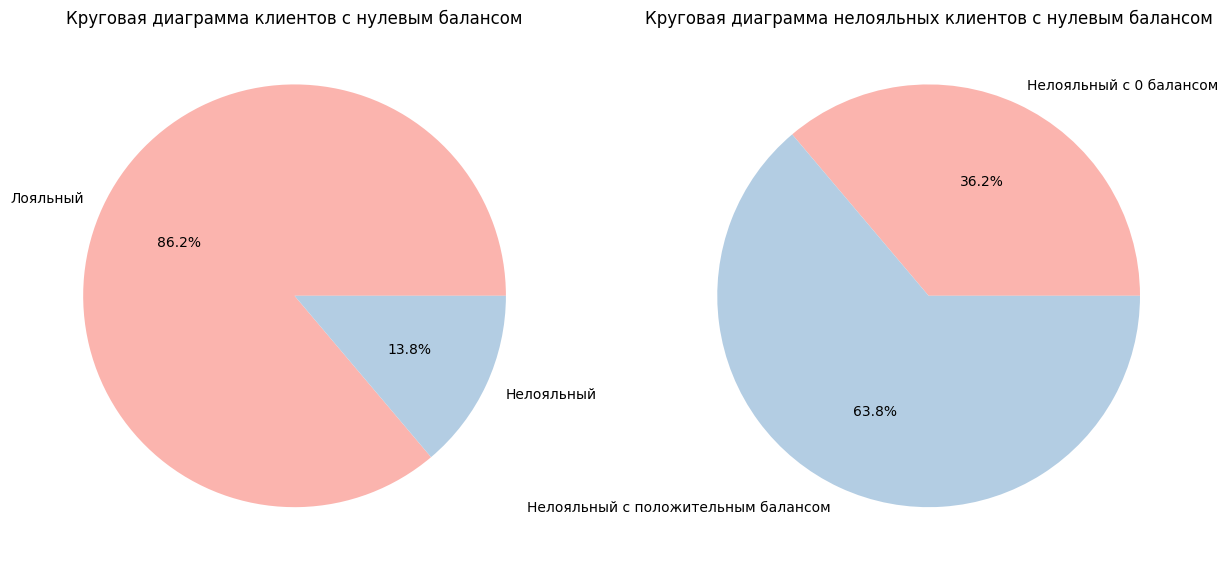

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,8))
axes[0].pie(churn_data[churn_data['Balance'] == 0]['Exited'].value_counts(), 
        colors=sns.color_palette('Pastel1'), 
        autopct='%.1f%%', 
        radius=1,
        labels=['Лояльный', 'Нелояльный'])
axes[0].set_title("Круговая диаграмма клиентов с нулевым балансом")

not_loyal = churn_data[churn_data['Exited'] == 1]
axes[1].pie([churn_data[churn_data['Balance'] == 0]['Balance'].count(), churn_data[churn_data['Balance'] > 0]['Balance'].count()], 
        colors=sns.color_palette('Pastel1'), 
        autopct='%.1f%%', 
        radius=1,
        labels = ['Нелояльный с 0 балансом', 'Нелояльный с положительным балансом'])
axes[1].set_title("Круговая диаграмма нелояльных клиентов с нулевым балансом")



Среди всех клиентов с нулевым балансом преобладают лояльные, а нелояльные составляют лишь около 14%. Однако, если посмотреть на распределение нулевого баланса среди нелояльных клиентов, можно заметить, что большинство из них до ухода имели положительный баланс на счету. Это указывает на то, что в зоне риска находятся именно те клиенты, у которых есть деньги на счете. Тем не менее, отток среди клиентов с нулевым балансом также значителен, что подчеркивает необходимость уделять особое внимание этой категории, как среди лояльных, так и среди нелояльных клиентов.

Невысокая доля клиентов с нулевым балансом среди ушедших может свидетельствовать о том, что эти клиенты изначально не были заинтересованы в услугах банка и открыли счет "на всякий случай" или потому, что он "может пригодиться". Возможно, их отпугнули невыгодные условия или неудобство использования онлайн-сервисов.

Чтобы снизить риск потери клиентов с нулевым балансом, банку стоит активнее привлекать их внимание, предлагая специальные условия, пробные периоды, а также проводя опросы, чтобы узнать, какие услуги они планировали использовать. Такие клиенты могут в данный момент искать более выгодные предложения у конкурентов, поэтому банк должен приложить максимум усилий, чтобы заинтересовать и удержать их.


Давайте детально рассмотрим лояльных клиентов с нулевым балансом. Исследуем, как долго они оставались клиентами банка при нулевом балансе. Построим гистограмму, чтобы определить, на каком году сотрудничества наблюдается наибольшее количество таких клиентов.

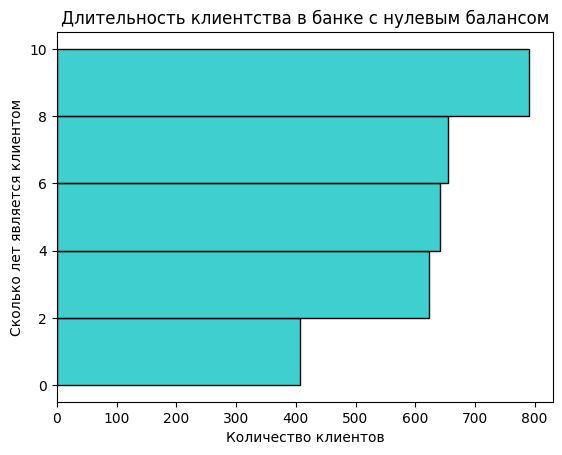

In [10]:
loyal_clients = churn_data[(churn_data['Balance'] == 0) & (churn_data['Status'] == 'Лояльный клиент')]
axes = figsize=(10, 10)
sns.histplot(
    data=loyal_clients,
    y=loyal_clients['Tenure'],
    bins=5,
    color='c'
    )
plt.title('Длительность клиентства в банке с нулевым балансом')
plt.ylabel("Сколько лет является клиентом")
plt.xlabel("Количество клиентов");

Наибольшее количество клиентов с нулевым балансом находится среди тех, кто является клиентом банка более 8 лет. Это может свидетельствовать о том, что такие клиенты могли перейти в другой банк, но по каким-то причинам не закрыли счет в этом банке. Также возможно, что у них возникли финансовые трудности, из-за которых они исчерпали денежные средства на счетах.

Банку следует связаться с этими клиентами, чтобы получить обратную связь: узнать, почему они перестали пользоваться счетами и что могло бы мотивировать их вернуться к активному использованию услуг банка. Также стоит рассмотреть возможность закрытия счетов после определенного периода неактивности, предварительно уведомив клиента. Это позволит банку сосредоточиться на активных клиентах и эффективнее анализировать показатели по ушедшим. Лояльных клиентов с нулевым балансом следует анализировать наряду с ушедшими, чтобы лучше понять причины оттока и улучшить работу с клиентами в будущем.

#### 4. Пришло время посмотреть на распеределение возраста среди клиентов
Необходимо проанализировать различия в возрасте между лояльными и нелояльными клиентами. Для каждой группы нужно определить медианный возраст и выделить характерные возрастные диапазоны.

In [11]:
fig = px.box(churn_data,
    y='Status',
    x='Age',
    color='Status',
    title='Распределение возраста'
    );

fig.show()

Медианный возраст нелояльных клиентов на 9 лет выше, чем у лояльных. Кроме того, разброс возрастных значений у ушедших клиентов значительно шире: от 38 до 51 лет, тогда как у лояльных — от 31 до 41 года. Клиенты старше 40 лет попадают в "зону риска", так как среди них велика вероятность отказа от услуг банка.

Возможные причины:

После 40 лет у клиентов могут измениться финансовые потребности, и они могут пересмотреть свои инвестиционные стратегии и пенсионные планы. Продукты банка могут оказаться неподходящими для данной возрастной группы. Банк не всегда учитывает потребности старшего поколения, что может привести к снижению их мотивации для дальнейшего использования услуг.
С течением времени некоторые банковские продукты могут потерять актуальность для старших клиентов, что снижает их активность в использовании услуг.
Старшее поколение может испытывать трудности с использованием современных онлайн-сервисов и приложений, что также влияет на снижение активности.
Рекомендации:

Провести анализ потребностей старшего поколения и разработать предложения, которые будут соответствовать их требованиям.
Обучать клиентов работе с новыми технологиями и улучшать интерфейс, делая его более интуитивно понятным.
Предлагать максимально прозрачные условия и избегать навязывания скрытых услуг. С возрастом клиенты становятся более внимательными и настороженными. Эта категория — опытные пользователи, которые хорошо видят подводные камни и не желают тратить деньги впустую.

#### 5. Построим график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты.
Посмотрим есть ли взаимосвязь между кредитным рейтингом и уровнем дохода клиента. А также посмотрим как различаются эти данные среди лояльных и нелояльных клиентов.
Для этого воспользуемся графиком joinplot из библиотеки seaborn

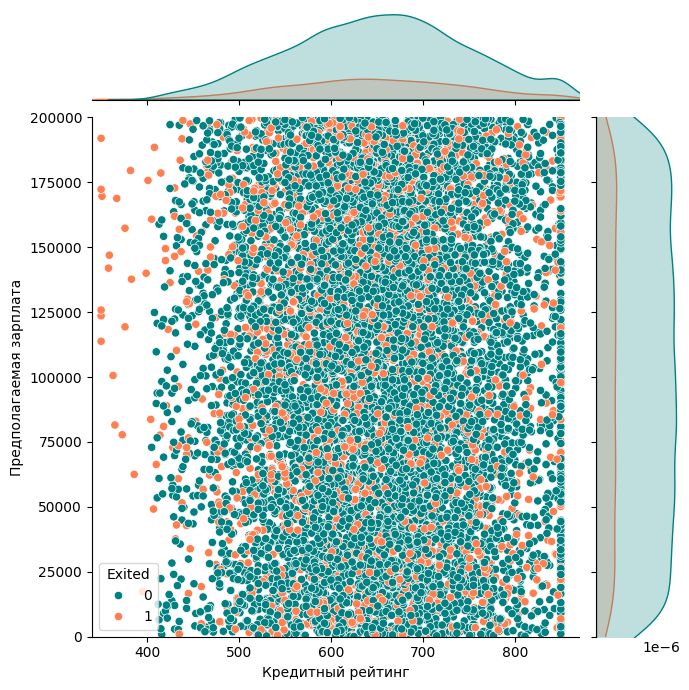

In [12]:
joint_plot = sns.jointplot(
    data=churn_data, 
    x='CreditScore', 
    y='EstimatedSalary',
    hue='Exited',
    palette=['teal', 'coral'],
    xlim=(340, 870),
    ylim=(0, 200000),
    height=7
    )
joint_plot.set_axis_labels('Кредитный рейтинг', 'Предполагаемая зарплата')
plt.show()

Среди лояльных клиентов отсутствуют те, чей кредитный рейтинг ниже 400. Плотность точек увеличивается с ростом кредитного рейтинга, что указывает на более активное участие клиентов с высоким рейтингом в банковских продуктах.

Высокая концентрация ушедших клиентов (синие точки) наблюдается в среднем сегменте кредитных рейтингов, что может свидетельствовать о трудностях в удержании этой категории клиентов.

Интересно, что доля ушедших клиентов значительно меньше среди тех, у кого кредитный рейтинг находится на очень высоком или очень низком уровне. Это может быть связано с особыми финансовыми условиями или предложениями банка, направленными на удержание клиентов с различными уровнями кредитного рейтинга.

#### 6. Проанализируем кто уходит чаще: мужчины или женщины?
Для анализа доли ушедших клиентов в разрезе гендерного признака можно построить круговую диаграмму, которая наглядно покажет, какая доля мужчин и женщин преобладает среди ушедших клиентов. На диаграмме следует изобразить процентное соотношение ушедших клиентов по полу, чтобы выявить возможные гендерные различия в уровне оттока.

Если, например, доля женщин среди ушедших клиентов окажется значительно выше, чем мужчин (или наоборот), это может указывать на наличие специфических проблем или неудовлетворенности у данной группы, требующих дополнительного анализа и корректировки стратегии удержания клиентов.


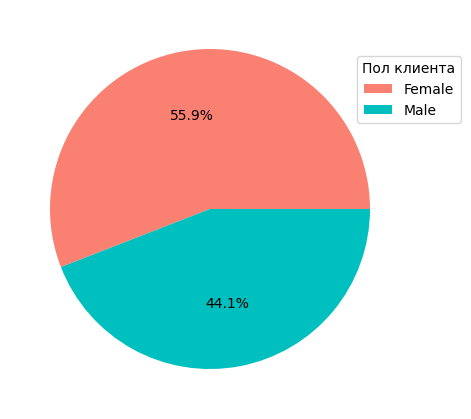

In [13]:
departed_clients = churn_data[churn_data['Status'] == 'Ушедший клиент']['Gender'].value_counts()
fig = plt.figure(figsize=(4, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    departed_clients,
    autopct='%.1f%%',
    colors=['salmon', 'c']
    )
axes.legend(
            departed_clients.index,
            title='Пол клиента', 
            loc='upper left', 
            bbox_to_anchor=(0.85, 0.9)
            );

На основании предоставленных данных о распределении ушедших клиентов между мужчинами и женщинами (где 56% составляют женщины и 44% — мужчины) можно сделать следующие выводы:

Женщины составляют большую часть ушедших клиентов. Это может свидетельствовать о том, что текущие продукты и услуги банка, а также обслуживание, могут не полностью удовлетворять потребности и ожидания женщин.
Необходимость изучения специфических причин:

Необходимо провести более глубокий анализ, чтобы понять, почему женщины уходят чаще, чем мужчины. Это может включать изучение клиентского опыта, удобства использования банковских сервисов, предложения продуктов, подходящих для женщин, и другие факторы.
Потенциальные области для улучшения:

Улучшение клиентского сервиса и персонализация уровня обслуживания могут снизить уровень оттока. Возможно, потребуется разработать более гибкие или специальные предложения, которые лучше удовлетворяют потребности женщин.

Так как доля мужчин среди ушедших клиентов достаточно высока, для изучения причин оттока клиентов эту группу необходимо также детально изучить.

1. Для детального анализа ушедших клиенток среди женщин, важно рассмотреть следующие параметры:

* Возраст:

Выявление возрастных категорий, наиболее подверженных уходу. Например, если значительная доля ушедших женщин находится в определенном возрастном диапазоне (например, 30-40 лет), это может указать на специфические жизненные события или финансовые потребности, которые банк не удовлетворяет.
Баланс:

* Баланс на счетах ушедших женщин. Низкий баланс может свидетельствовать о том, что клиенты не видят смысла хранить средства в этом банке, тогда как высокий баланс может указывать на недостаток выгодных предложений для активных клиентов.
Кредитный рейтинг:

* Анализ кредитного рейтинга ушедших женщин может помочь понять, уходят ли клиенты с низким рейтингом из-за отсутствия доступных кредитных предложений или уходят клиенты с высоким рейтингом, которым банк не предложил достаточно выгодные условия.
Наличие кредитной карты:

* Выявление доли ушедших клиенток с кредитными картами по сравнению с теми, у кого их не было. Это поможет понять, насколько эффективны текущие кредитные продукты и программы лояльности.
Количество опробованных услуг банка:

Анализ того, сколько и какие именно банковские услуги использовали ушедшие клиентки. Это может дать представление о том, какие продукты или услуги не оправдали их ожиданий.

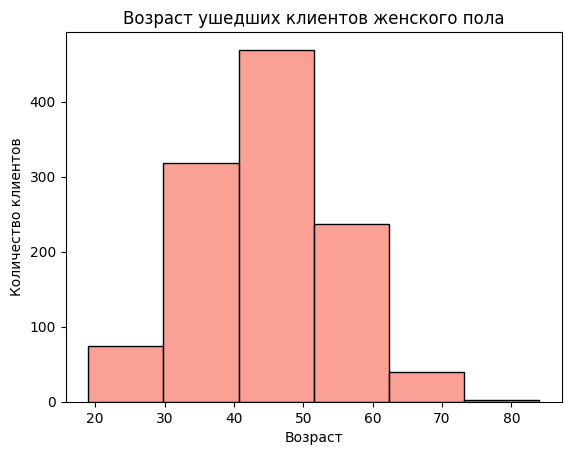

In [14]:
departed_clients_women = churn_data[(churn_data['Status'] == 'Ушедший клиент') & (churn_data['Gender'] == 'Female')]['Age']
axes = figsize=(10, 10)
sns.histplot(
    data=churn_data,
    x=departed_clients_women,
    bins=6,
    color='salmon'
    )
plt.title('Возраст ушедших клиентов женского пола')
plt.ylabel("Количество клиентов")
plt.xlabel("Возраст");

Чаще всего среди нелояльнх клиентов оказываются женщины в возрасте от 40 до 50 лет.

Изучим и другие характеристики по клиентам женского пола.

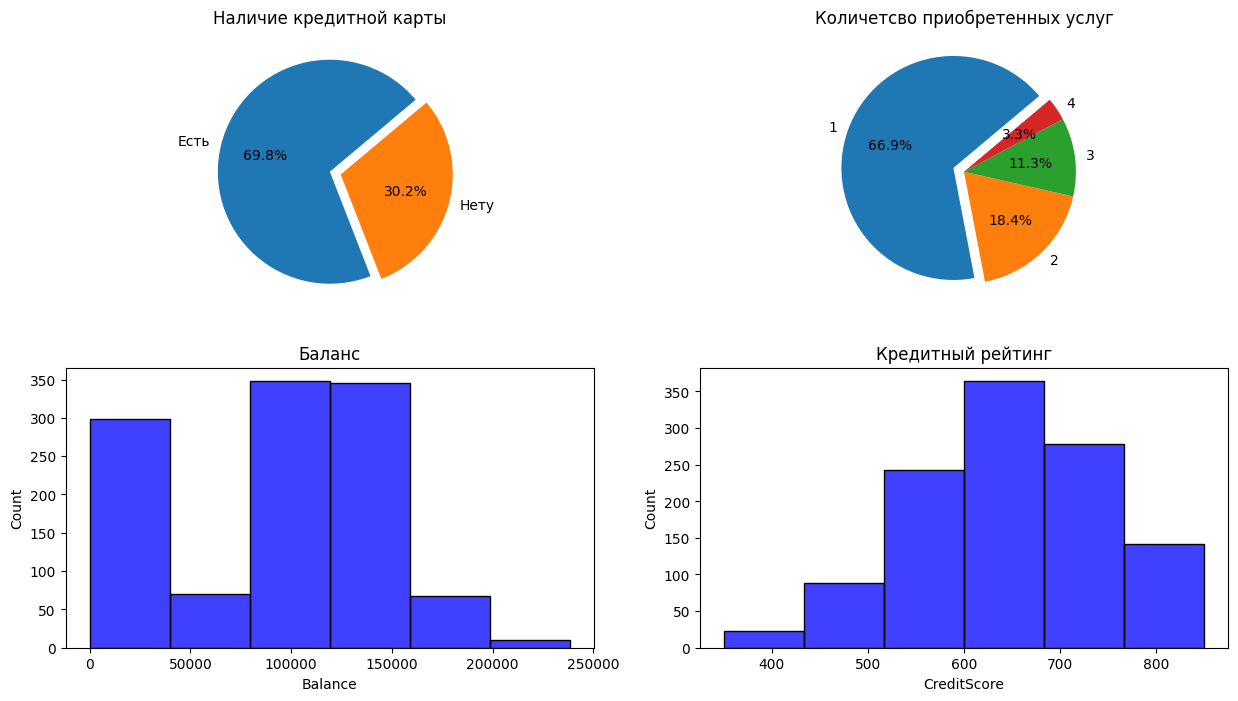

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,8))

dep_women = churn_data[(churn_data['Status'] == 'Ушедший клиент') & (churn_data['Gender'] == 'Female')]

axes[0][0].pie(
    dep_women['HasCrCard'].value_counts(),
    explode=(0, 0.1),
    startangle=40,
    labels = ['Есть', 'Нету'],
    autopct='%.1f%%');
axes[0][0].set_title('Наличие кредитной карты')

axes[0][1].pie(
    dep_women['NumOfProducts'].value_counts(),
    startangle=40,
    explode = (0.1, 0,0,0),
    labels = [1, 2, 3, 4],
    autopct='%.1f%%'
);
axes[0][1].set_title('Количетсво приобретенных услуг')

sns.histplot(
    data=dep_women,
    x='Balance',
    bins=6,
    color='b',
    ax=axes[1][0])
axes[1][0].set_title('Баланс')

sns.histplot(
    data=dep_women,
    x='CreditScore',
    bins=6,
    color='b',
    ax=axes[1][1]);
axes[1][1].set_title('Кредитный рейтинг');

Возрастной фактор: преобладает возрастная группа 40-50 лет, банку необходимо разработать специальные предложения для данной категории, чтобы повысить их лояльность.

Баланс: Если большинство ушедших клиенток имели либо низкий баланс,либо баланс на уровне 90000-160000. 

Кредитный рейтинг: Большинство ушедших женщин имеют средний кредитный рейтинг. Стоит проанализировать причины их недовольства предложениями банка, возможно, недостаток кредитных продуктов или неудовлетворительное обслуживание.

Кредитные карты: Был выявлена значительная доля клиентов с кредитной картой среди ушедших клиентов женского пола. Это может сигнализировать о том, что недовольство вызвано использованием кредитной продукции. Возможно невыгодные тарифы по кредитной карте или наличие у конкурентов более выгодных предложений.

Опробованные услуги: 
Среди женщин, которые перестали быть клиентами банка, преобладают те, что использовали всего 1 услугу в банке. Необходимо детально изучить, что именно это была за услуга. Возможно таким образом можно выявить проблемный продукт. Также это может свидетесльствовать о недостаточной работе с клиентами со стороны банка.

2. Проведем аналогичный анализ для ушедших клиентов мужского пола.


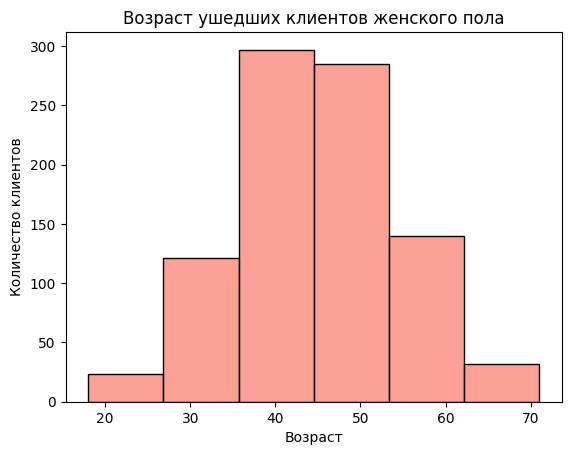

In [16]:
departed_clients_men = churn_data[(churn_data['Status'] == 'Ушедший клиент') & (churn_data['Gender'] == 'Male')]['Age']
axes = figsize=(10, 10)
sns.histplot(
    data=churn_data,
    x=departed_clients_men,
    bins=6,
    color='salmon'
    )
plt.title('Возраст ушедших клиентов женского пола')
plt.ylabel("Количество клиентов")
plt.xlabel("Возраст");

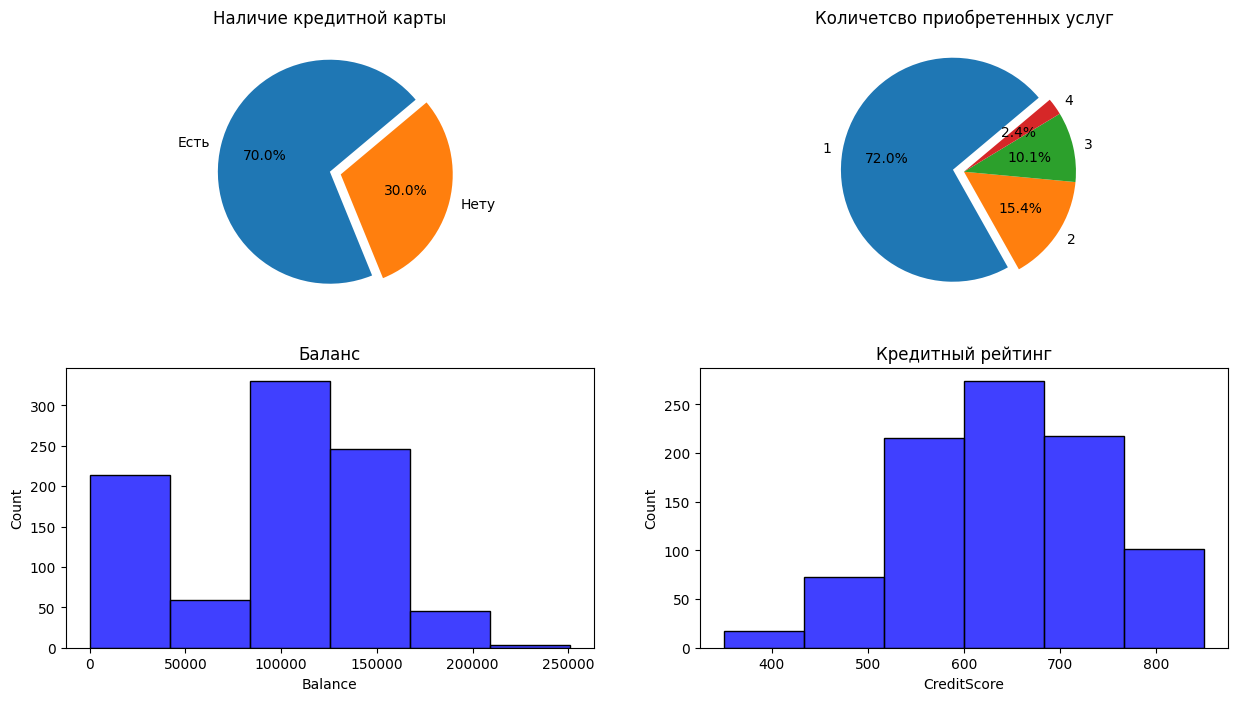

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,8))

dep_men = churn_data[(churn_data['Status'] == 'Ушедший клиент') & (churn_data['Gender'] == 'Male')]

axes[0][0].pie(
    dep_men['HasCrCard'].value_counts(),
    explode=(0, 0.1),
    startangle=40,
    labels = ['Есть', 'Нету'],
    autopct='%.1f%%');
axes[0][0].set_title('Наличие кредитной карты')

axes[0][1].pie(
    dep_men['NumOfProducts'].value_counts(),
    startangle=40,
    explode = (0.1, 0,0,0),
    labels = [1, 2, 3, 4],
    autopct='%.1f%%'
);
axes[0][1].set_title('Количетсво приобретенных услуг')

sns.histplot(
    data=dep_men,
    x='Balance',
    bins=6,
    color='b',
    ax=axes[1][0])
axes[1][0].set_title('Баланс')

sns.histplot(
    data=dep_men,
    x='CreditScore',
    bins=6,
    color='b',
    ax=axes[1][1]);
axes[1][1].set_title('Кредитный рейтинг');

Среди мужчин мы получаем практически аналогичные данные. Немного сдвинулись показатели возраста и баланса. В остальном мы получаем похожую картину.
Теперь мы четко можем сформулировать группу риска:
* Клиенты в возрасте 35 -  55 лет
* Клиенты с 0 балансом или балансом от 100000 до 150000
* Клиенты со средним кредитнм рейтингом
* Клиенты, у которых есть кредитная карта и использовавшие всего 1 услугу в банке.
Проведенный анализ четко выделил группу риска среди клиентов, которые наиболее вероятно могут покинуть банк. Это поможет направить усилия на удержание именно этих клиентов, разработав для них целевые предложения и программы лояльности. Особое внимание можно уделить:

* Персонализированным предложениям: Разработка предложений для клиентов с нулевым балансом или с балансом от 100,000 до 150,000, которые будут стимулировать их активнее пользоваться банковскими продуктами.

* Повышению уровня обслуживания: Дополнительное внимание к клиентам со средним кредитным рейтингом, возможно, предложив им улучшенные условия по кредитам или более персонализированный сервис.

* Расширению использования услуг: Стимулирование клиентов, использовавших только одну услугу, попробовать другие продукты банка. Это может быть достигнуто через кросс-продажи и специальные бонусные программы для расширения их опыта работы с банком.

#### 7. Изучим количетсво приобретенных услуг среди лояльных и нелояльных клиентов.
Для этого построим многоуровневую столбчатую диаграмму. Для начала сгруппируем данные по статусу клиента и количетсва, приобретенных услуг. На основании этой таблицы уже будем строить график. Это покажет отличается ли количество приобретенных услуг у лояльных и нелояльных клиентов. Благодаря этому можно будет понять оптимальное количетсво услуг, необходимое для удержания клиента.

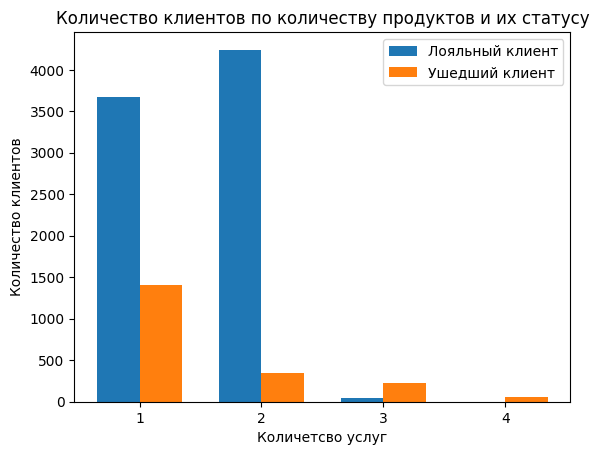

In [18]:
c = churn_data.groupby(['Status', 'NumOfProducts'])['NumOfProducts'].count().unstack()
index = c.loc['Лояльный клиент'].index
bar_width = 0.35
plt.bar(index, 
        c.loc['Лояльный клиент'],
        bar_width, 
        label='Лояльный клиент'
        )
plt.bar(
    [i + bar_width for i in index], 
    c.loc['Ушедший клиент'], 
    bar_width,label='Ушедший клиент'
    )

plt.xlabel('Количетсво услуг')
plt.ylabel('Количество клиентов')
plt.title('Количество клиентов по количеству продуктов и их статусу')

plt.xticks([i + bar_width/2 for i in index], index)
plt.legend()

plt.show()

У лояльных клиентов как правило не больше 2х услуг. С ростом количества приобретенных услуг сокращается число нелояльных клиентов и увеличивается число лояльных. Среди клиентов с 3-4 услугами, доля лояльных сокращается практически до 0. Это говорит о том, что слишком большое количество услуг, отпугивает клиентов. Идеальным вариантом будет предложение еще одной услуги для клиентов, которые пока воспользовались только 1 продуктом в банке.

#### 8. Посмотрим влияет ли статус активного клиента на отток
Может ли повлиять наличие или отсутствие статуса активного клиента на отток. Для данного анаоиза построим тепловую карту.

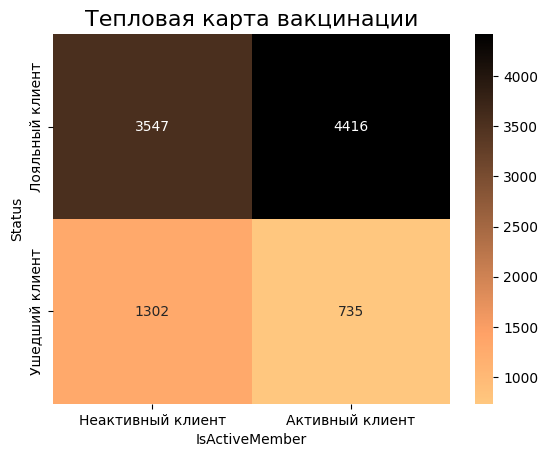

In [19]:
c = churn_data.groupby(['Status', 'IsActiveMember'])['IsActiveMember'].count().unstack()
heatmap = sns.heatmap(data=c,
                    cmap='copper_r',
                    annot=True, 
                    fmt='1')
heatmap.set_title('Тепловая карта вакцинации', fontsize=16)
heatmap.set_xticklabels(['Неактивный клиент', 'Активный клиент']);

Из предоставленных данных можно сделать несколько выводов и рекомендаций для банка:

Выводы:
* Активные клиенты более склонны к лояльности: Большинство активных клиентов (4416 человек) также являются лояльными. Это может указывать на то, что удержание активности клиентов способствует увеличению уровня лояльности.
* Большинство нелояльных клиентов были неактивными. Значит с потерей статуса "активный" растет риск потерять такого клиента. 

Рекомендации:
* Необходимо уделить особое внимание лояльным и неактивным клиентам, предложив им инливидуальные предложения и условия.Также необходимо обратить внимание на нелояльных клиентов, которые все еще активны (735 человек), возможно, предложив им индивидуальные условия или улучшенное обслуживание.
* Разработать и внедрить программы, направленные на вовлечение неактивных клиентов, такие как персонализированные предложения или привлекательные условия.
* Продолжать поддерживать уровень активности клиентов через высококачественное обслуживание и предложения, а также регулярные программы лояльности.
* Обучить сотрудников банка эффективным методам удержания клиентов и улучшения уровня обслуживания.

#### 9. Изучим в какой стране отток клиентов больше
Так как клиентом банка могут люди из разных стран, необходимо посмотреть одинаков ли отток клиентов в разных странах.

In [20]:
countries = churn_data.groupby(['Geography'])['Status'].value_counts(normalize=True).round(4).unstack()
countries = countries * 100
fig = px.imshow(countries, text_auto=True, color_continuous_scale='tempo', origin='upper', width= 700, height=700, title= 'Теплловая карта')
fig.show()
countries = countries.loc[:, 'Ушедший клиент'].reset_index()
countries = countries[['Geography', 'Ушедший клиент']]
fig = px.choropleth(
    data_frame=countries,
    locations="Geography",
    locationmode = "country names",
    color="Ушедший клиент",
    range_color=[0, 50],
    labels={'Ушедший клиент': 'Доля'},
    scope = 'europe',
    width=500, 
    height=500, 
    color_continuous_scale='tempo' 
    )
fig.show()


Самая высокая доля ушедших клиентов в разрезе стран, наблюдается у Германии. В разных странах могут быть разные ожидания и подходы к банковским услугам. В Германии, возможно, более высокая требовательность к качеству услуг и вниманию к деталям, что может привести к большему недовольству, если эти ожидания не оправдываются. В Германии может быть больше конкуренции среди банков, что делает клиентов более склонными к смене банка при малейшем неудовольствии. Клиенты могут переходить в другие банки, предлагающие лучшие условия, такие как более низкие проценты по кредитам или более высокие ставки по депозитам.

#### 10. Проанализируем каков процент оттока в зависимости от кредитного рейтнига и продолжительности сотрудничетсва с банком.
Построим тепловую карту, которая покажет как зависит отток клиентов в зависимости от их кредитного рейтинга и количества лет, которые они являются клиентом. Тепловая карта покажет, в каких комбинациях кредитного рейтинга и количества лет в банке наблюдается наибольший отток клиентов. На основе этого можно будет определить наиболее уязвимые категории клиентов. 
Проанализирем также показатели отедльно среди женского и мужского населения.


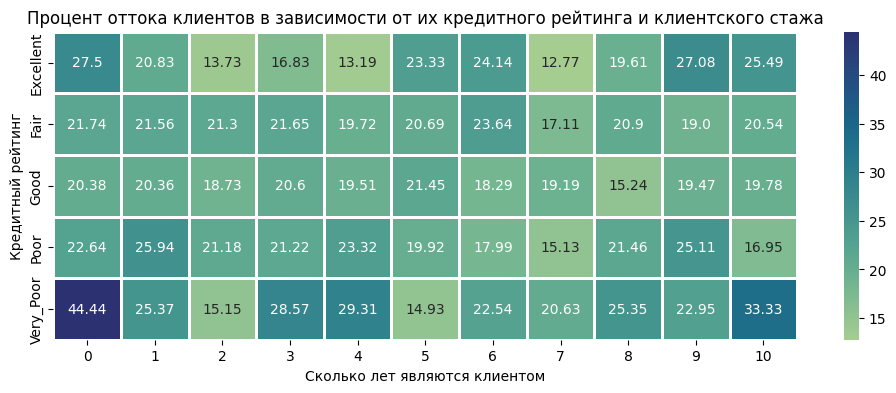

In [21]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)
pivot = churn_data.pivot_table(
    values= 'Exited',
    index='CreditScoreCat',
    columns='Tenure',
    aggfunc='mean')*100
pivot = pivot.round(2)
plt.figure(figsize=(12, 4))
heatmap = sns.heatmap(
                    data=pivot,
                    cmap='crest',
                    annot=True, 
                    fmt='1', 
                    linewidth=1)
heatmap.set_title('Процент оттока клиентов в зависимости от их кредитного рейтинга и клиентского стажа')
heatmap.set(xlabel="Сколько лет являются клиентом", ylabel="Кредитный рейтинг");


В первый год клиентства среди людей с низким кредитным рейтингом наблюдается самый высокий процент оттока. Также процент оттока для этой категории клиентов очень высокий на 10 год сотрудничества. Для клиентов с высоким кредитным рейтинг, повышенный отток происходит в 1, 9 и 10 год. 2 и 7 год сотрудничества являются самыми спокойными с самым низким процентом оттока среди всех уровней кредитного рейтинга.
Ранее было выявлено, что чаще всего среди нелояльных клиентов, оказываются женщины, который приобретали только 1 услугу. Посмотрим как изменится тепловая карта для данной категории клиентов.

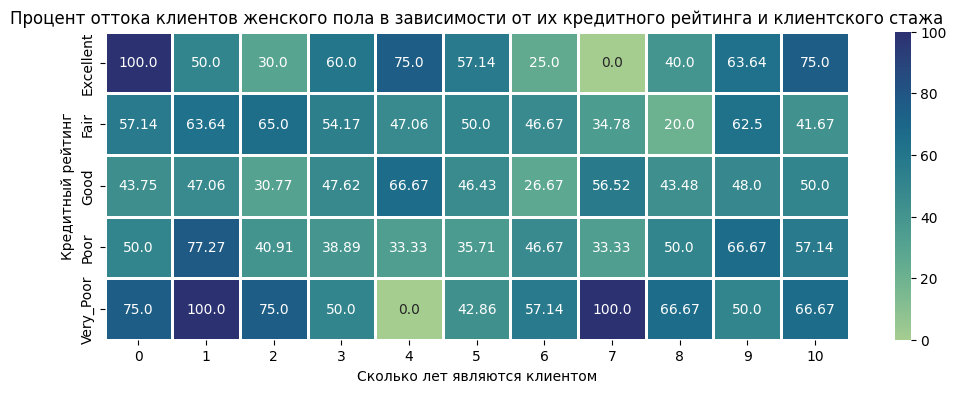

In [22]:
pivot_w = churn_data[(churn_data['Gender'] == 'Female') & (churn_data['NumOfProducts'] == 1) & (churn_data['Age'].isin(range(40,52)))].pivot_table(
    values= 'Exited',
    index='CreditScoreCat',
    columns='Tenure',
    aggfunc='mean')*100
pivot_w = pivot_w.round(2)

plt.figure(figsize=(12, 4))
heatmap = sns.heatmap(
        data=pivot_w, 
        cmap='crest', 
        annot=True, 
        fmt='1', 
        linewidth=1
        )
heatmap.set_title('Процент оттока клиентов женского пола в зависимости от их кредитного рейтинга и клиентского стажа')
heatmap.set(
    xlabel="Сколько лет являются клиентом", 
    ylabel="Кредитный рейтинг"
    );

На тепловой карте выделена категория женщин 40-50 лет  и имеющих 1 приобретенную услугу.
Для этой категории, при самом высоком рейтинге, 100% перестают быть клиентами банка уже в первый год. Среди женщин с самым низким кредитным рейтингом вероятность того, что они перестанут быть клиентами банка сохраняется на уровне от 50% и выше практически все время. В первые 2 года банк теряет не менее 65% клиентов, рассматриваемой категории.

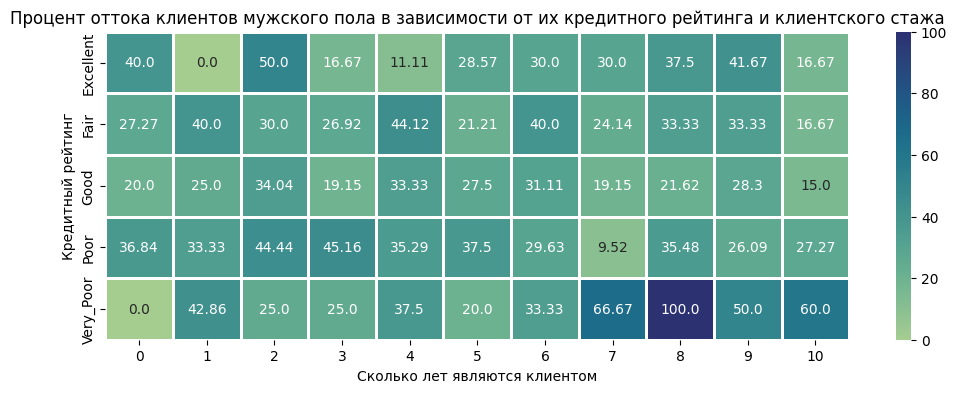

In [23]:
pivot_m = churn_data[(churn_data['Gender'] == 'Male') & (churn_data['NumOfProducts'] == 1) & (churn_data['Age'].isin(range(37,52)))].pivot_table(
    values= 'Exited',
    index='CreditScoreCat',
    columns='Tenure',
    aggfunc='mean')*100
pivot_m = pivot_m.round(2)

plt.figure(figsize=(12, 4))
heatmap = sns.heatmap(
        data=pivot_m, 
        cmap='crest', 
        annot=True, 
        fmt='1', 
        linewidth=1
        )
heatmap.set_title('Процент оттока клиентов мужского пола в зависимости от их кредитного рейтинга и клиентского стажа')
heatmap.set(
    xlabel="Сколько лет являются клиентом", 
    ylabel="Кредитный рейтинг"
    );

Среди мужчин рост оттока клиентов с низким кредитным рейтингом наблюдается начиная с 7 года сотрудничества и достигает пика в 100% на 8 год.
Также в первый год сотрудничества для клиентов с самых низким кредитным рейтингом среди мужчин наблюдался 0% отток, как и для мужчин с высоким кредитным рейтингом во второй год. Для среднего кредитного рейтинга наблюдается более менее стабильный отток клиентов. С небольшими повышениями на 2,4 год.

#### Основные выводы:
**Возрастной фактор**: 
Группа риска сосредоточена в возрастной категории 35-55 лет, что требует разработки специальных предложений, адаптированных под потребности и интересы этой возрастной группы.

**Баланс на счету**: 
Клиенты с нулевым балансом или балансом от 100,000 до 150,000 рублей подвержены наибольшему риску ухода. Это указывает на необходимость разработать целевые программы удержания, стимулирующие этих клиентов активнее пользоваться банковскими услугами.

**Кредитный рейтинг**: 
Ушедшие клиенты в основном имеют средний кредитный рейтинг, что может свидетельствовать о недостаточности предложений, подходящих для этой категории. Важно проанализировать условия кредитования и предложить более выгодные решения для клиентов со средним рейтингом.

**Использование банковских услуг**:
 Клиенты, использовавшие только одну услугу, наиболее склонны к уходу. Это говорит о том, что банк должен активнее предлагать дополнительные продукты и услуги, чтобы удержать этих клиентов и повысить их удовлетворенность.

**Различие в поведении по **полу**: 
Женщины с высоким кредитным рейтингом и одной услугой наиболее склонны к уходу в первый год, а с самым низким ретингом склонны к уходу в первые 3 года. Клиенты любого пола с низким кредитным рейтингом начинают покидать банк после 7 лет сотрудничества. Эти различия требуют гендерно-специфического подхода к удержанию клиентов.

#### **Рекомендации**:
**Персонализированные предложения**: 
Разработать программы лояльности для клиентов с нулевым балансом или балансом в диапазоне 100,000 - 150,000 рублей. Это могут быть бонусы за активное использование счетов или более выгодные условия по кредитам и вкладам.

**Повышение качества обслуживания**: 
Ориентироваться на клиентов со средним кредитным рейтингом, предлагая улучшенные условия и персонализированный подход. Например, можно создать специальные пакеты услуг, направленные на повышение их финансовой стабильности.

**Кросс-продажи**: 
Активно предлагать дополнительные услуги клиентам, которые пока используют только один продукт банка. Например, если клиент пользуется только кредитной картой, предложить ему открыть вклад на выгодных условиях или подключить мобильное приложение для управления финансами.

**Анализ неудовлетворенности клиентов**:
Проводить регулярные опросы и анализ отзывов, чтобы выявить слабые места в работе банка и своевременно устранять проблемы, особенно среди клиентов женского пола, которые демонстрируют высокий отток в первый год.

**Гендерно-специфические программы**: 
Разработать специальные предложения для мужчин и женщин с учетом их поведения и склонностей к оттоку. Например, предложить женщинам с высоким кредитным рейтингом дополнительные бонусы или сервисы, которые помогут удержать их в банке в течение первого года.

**Работа с клиентами, находящимися в зоне риска**:
Выявить и активно работать с клиентами, у которых на счету есть накопления, чтобы предотвратить их уход. Это может включать в себя персональные консультации, выгодные предложения по инвестициям или кредитным продуктам.

**Улучшение онлайн-сервисов**: 
Улучшить пользовательский опыт в онлайн-банкинге, особенно для клиентов с нулевым балансом, чтобы стимулировать их к более активному использованию услуг банка.

